# CAA8 story

In [4]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [5]:
import Data

data,sta,date,lon,lat,P,d,t,s,Tr,fluo,oxy_uM,oxy_mL,rho,isop,si,ti,NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,nut = Data.AllData_variables()
PaThData,PaTh_sta,PaTh_lon,PaTh_lat,PaTh_t,PaTh_s,PaTh_rho,PaTh_d = Data.PaTh_variables()
listAllSta,listPaThSta,PaThDataSorted,PaThSort_sta,PaThSort_d,Pa,Th,PaTh,PaErr,ThErr,PaThErr = Data.PaTh_varSorted()

/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/DerivVar.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  isop = np.zeros((ydim,xdim))


354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


354.0 13.0
354.0 13.0


/home/mgrenier/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DtypeWarning: Columns (0,10,24,26,27,28,29,30,31,32,33,34,35,37,38,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.


354.0 13.0


In [6]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.figure as mfig
import matplotlib.image as mpimg
from matplotlib import gridspec

import netCDF4 as nc
import numpy as np
import scipy.io as sio
import pandas as pd
import pickle as pl
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from salishsea_tools import nc_tools
from salishsea_tools import viz_tools
from salishsea_tools import  psu_tools

from matplotlib.pyplot import *
#from seabird.cnv import fCNV

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [7]:
#dir()
#locals()
#globals()
listPaThSta

['K1',
 'LS2',
 'BB1',
 'BB3',
 'BB2',
 'CB2',
 'CB3',
 'CB4',
 '308/CAA8',
 'KC 500-2007',
 'KC 2000-2007',
 'KC 2700-2007',
 'A01-95',
 'L1.1-2009',
 'L2-2009',
 'L3-2009',
 '2',
 '93']

In [8]:
data.head()

,Cruise,Station,Type,date,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,PaErr,Th,ThErr,PaTh,PaThErr,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,rho,transmi,fluo,sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],Oxy_uM,Oxy_mL,"Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Cast-nut,Press,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,Ammonium-1 [?mol/L],Ammonium-2 [?mol/L],Extracted Chlorophyll a (ug/l),Extracted Phaeo-pigment (ug/l),Unnamed: 66,Unnamed: 67,Chlorophyll a (Fluorometer) mg/m^3
0,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,7.0,6.940,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.327,26.182964,NaN,NaN,33.3184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33165.0,308.472,7.08798,102.23218,6.93322,6.94424,2.5814,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,8.0,7.932,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3266,26.181990,NaN,NaN,33.3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,306.462,7.04178,101.56426,6.93332,6.94435,2.5744,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,9.0,8.924,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.326,26.182461,NaN,NaN,33.3176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,307.238,7.05961,101.82020,6.93341,6.94444,2.5722,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,10.0,9.915,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3253,26.182787,NaN,NaN,33.3179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33164.0,307.296,7.06094,101.83797,6.93351,6.94454,2.5717,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arctic GEOTRACES 2015 Leg 2,K1,C,2014-07-15T14:42:00.00,-53.369283,56.120867,3309.0,11.0,10.906,NaN,TM4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3249,26.181654,NaN,NaN,33.3164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33163.0,307.042,7.05510,101.75160,6.93365,6.94468,2.5709,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
nut.head()

,Cruise,Station,Type,date,lon,lat,z_bottom,P,d,Cast,Cast name,Pressure,Pa,PaErr,Th,ThErr,PaTh,PaThErr,eNd,Erreur sur eNd,[Nd]pmol/kg,Erreur sur [Nd],Nd/yb,Ce/Ce*,temp,rho,transmi,fluo,sal,dens,SPVA_01 [m**3/kg],VAIS_01 [s^-2],SIGO_01 [kg/m**3],POTM_01 [degrees C],SIGP_01 [kg/m**3],FRET_01 [degrees C],DOXY_01 [ml/l],CDOM_01 [mg/m**3],NTRA_01 [mmol/m**3],PSAR_01 [ueinsteins/s/m**2],SPAR_01 [ueinsteins/s/m**2],ASAL [g/kg],CONT [deg C],D_CT [kg/m^3],D0CT [kg/m^3],Conductivity [uS/cm],Oxy_uM,Oxy_mL,"Oxygen, SBE 43 [% saturation]","Oxygen Saturation, Garcia & Gordon [ml/l]","Oxygen Saturation, Weiss [ml/l]","Oxygen raw, SBE 43 [V]",flag,Cast-nut,Press,Nitrite-1 [?mol/L],Nitrite-2 [?mol/L],NO3_1,NO3_2,PO3_1,PO3_2,SiO4_1,SiO4_2,Ammonium-1 [?mol/L],Ammonium-2 [?mol/L],Extracted Chlorophyll a (ug/l),Extracted Phaeo-pigment (ug/l),Unnamed: 66,Unnamed: 67,Chlorophyll a (Fluorometer) mg/m^3
5103,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,10.0,9.909,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.549,26.157957,93.761,0.856,33.323,26.204,184.849,NaN,26.158,6.55,26.158,-1.83,7.196,5.701,NaN,23.514,160.160,33.481,6.563,26.206,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.221,0.06,NaN,0.13,NaN,0.10,NaN,0.0,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
5106,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,13.0,12.881,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.675,0.925,33.323,26.218,184.863,0,26.158,6.547,26.158,-1.84,7.177,5.780,NaN,16.73,160.452,33.481,6.561,26.22,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.026,0.05,NaN,0.10,NaN,0.10,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,14.0,13.872,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.547,26.158218,93.688,0.888,33.323,26.223,184.876,0,26.158,6.547,26.158,-1.84,7.183,5.595,NaN,15.395,159.851,33.481,6.561,26.224,26.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,13.075,0.06,NaN,0.13,NaN,0.10,NaN,0.0,NaN,0.05,NaN,NaN,NaN,NaN,NaN,NaN
5113,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,20.0,19.817,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.563,26.372205,92.650,1.412,33.597,26.464,164.645,0,26.372,6.563,26.372,-1.86,7.124,5.977,NaN,8.338,158.180,33.756,6.573,26.466,26.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20.487,0.06,NaN,0.15,NaN,0.10,NaN,0.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
5125,2015002,K1,C,2015-07-14T09:58:50.00,-53.372,56.1215,3310.0,32.0,31.706,1.0,Geo-Nut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.742,27.409161,95.566,3.233,34.627,27.557,66.378,0,27.409,4.741,27.409,-1.92,8.296,6.059,NaN,2.186,156.200,34.791,4.738,27.559,27.411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,31.904,0.09,0.1,1.00,0.96,0.21,0.21,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN


# All stations; Pa & Th data

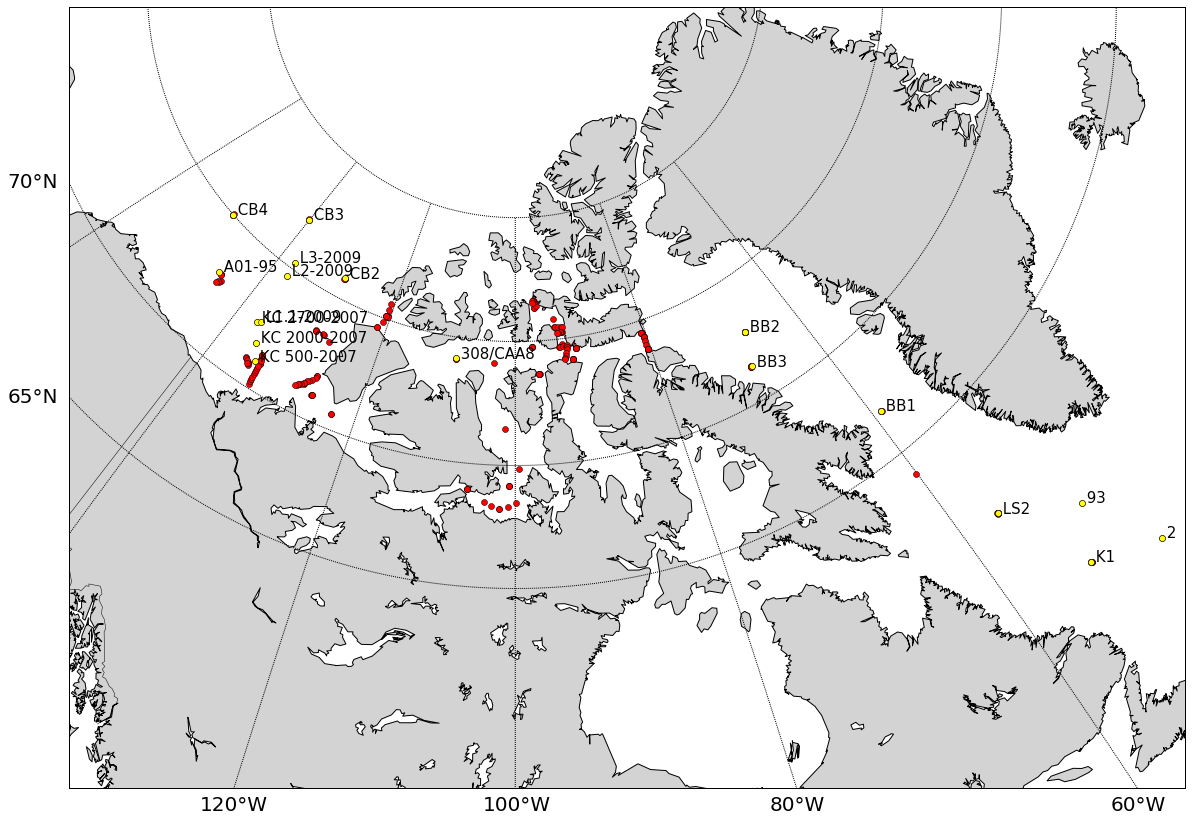

In [10]:
from wand.image import Image as WImage
img1= WImage(filename='/ocean/mgrenier/geotraces/analysis-Melanie/notebooks/Geotraces2015data/Figures/AllStationsRed-PaThStationsYellow_Map.png')
#img
img1

# What is the cause of the bottom $\rm ^{230}Th$ increase?

In [11]:
#PaThDataSorted.PaErr[PaThDataSorted.Station == '308/CAA8'].tolist()

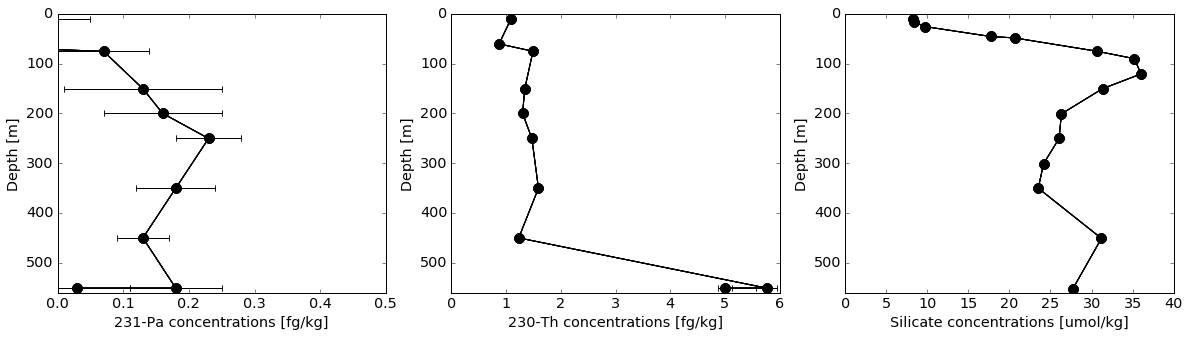

In [12]:
fig,((ax1,ax2,ax3)) = plt.subplots(1,3,facecolor='w',figsize=(20, 5)) 


#Plot Pa/Th sample profiles
for M,S,C in zip(('o-','o-','o'),(10,10,10),('k','k','k')):
    for ax,xfield,yfield,XERR,xlabels,ylabels,xranges,yranges in zip((ax1,ax2,ax3),(Pa,Th,nut.SiO4_1),
                                    (PaThSort_d,PaThSort_d,nut.d),
                                    (PaErr[PaThSort_sta == '308/CAA8'].tolist(),ThErr[PaThSort_sta == '308/CAA8'].tolist(),None),                                     
                                    ('231-Pa concentrations [fg/kg]','230-Th concentrations [fg/kg]','Silicate concentrations [umol/kg]'),
                                    ('Depth [m]','Depth [m]','Depth [m]'),
                                    ([0,0.5],[0, 6],[0,40]),
                                    ([0,560],[0, 560],[0,560])):
        ax.plot(xfield[sta == '308/CAA8'],yfield[sta == '308/CAA8'],M,markersize=S,color=C,label='CAA8')
        ax.errorbar(xfield[sta == '308/CAA8'],yfield[sta == '308/CAA8'],xerr=XERR,color=C)
        ax.set_xlim(xranges)
        ax.set_ylim(yranges)
        ax.set_xlabel(xlabels)
        ax.set_ylabel(ylabels)
        ax.invert_yaxis()
savefig('Figures/PaThStations_CAA8-Pa-Th-Si.png',bbox_inches='tight')


## => The very strong increase of dissolved $\rm ^{230}Th$ at the bottom is not associated with a similar increase in SiO4...